In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

### Archivo CSV

In [2]:
archivo = 'reto_precios.csv'

df = pd.read_csv(f'{archivo}')
df.head(2)

,main_name,subtitle,link,location,price,attributes,timestamp,id,address,since,...,apartments_per_floor,disposition,parking_lots,floor_situated,orientation,num_bedrooms,department_type,m2,final_price,price_square_meter
0,Departamento - Roma Norte,Departamento en venta,https://departamento.metroscubicos.com/MLM-139...,"Sinaloa 20 , Roma Sur, Roma Sur, Cuauhtémoc, D...",9000000 pesos,"127 m² construidos,2 recs.",2022-03-29,1,"Sinaloa 20 , Roma Sur",Publicado hace 5 días,...,NaN,Contrafrente,2,NaN,NaN,2.0,NaN,127.0,9000000.0,70866.141732
1,Preventa Exclusiva · Terraloza Roma Norte ·,Departamento en venta,https://departamento.metroscubicos.com/MLM-139...,"Tonala, Roma Norte, Cuauhtémoc, Distrito Federal",4264000 pesos,"54 m² construidos,1 rec.",2022-03-29,2,Tonala,Publicado hace 7 días,...,NaN,NaN,1,NaN,NaN,1.0,NaN,54.0,4264000.0,78962.962963


### Filtro manual

In [3]:
df_filtro = df.copy()

df_filtro = df_filtro[df_filtro['m2'] < 300]
df_filtro = df_filtro[df_filtro['final_price'] < 20000000]

df_filtro.reset_index(drop=True, inplace=True)

In [4]:
df_filtro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 978 entries, 0 to 977
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   main_name             978 non-null    object 
 1   subtitle              978 non-null    object 
 2   link                  978 non-null    object 
 3   location              978 non-null    object 
 4   price                 978 non-null    object 
 5   attributes            978 non-null    object 
 6   timestamp             978 non-null    object 
 7   id                    978 non-null    int64  
 8   address               699 non-null    object 
 9   since                 978 non-null    object 
 10  description           978 non-null    object 
 11  vendor                978 non-null    object 
 12  lat                   978 non-null    float64
 13  lon                   978 non-null    float64
 14  price_mod             978 non-null    float64
 15  price_currency        9

### Descripción

In [5]:
df_filtro['id'].nunique()

978

In [6]:
df_filtro.agg({'m2':['min', 'max']})

,m2
min,31.0
max,293.0


In [7]:
df_filtro.agg({'final_price':['min', 'max']})

,final_price
min,634217.0
max,17864000.0


In [8]:
df_filtro.agg({'price_square_meter':['min', 'max']})

,price_square_meter
min,4712.041885
max,150514.818182


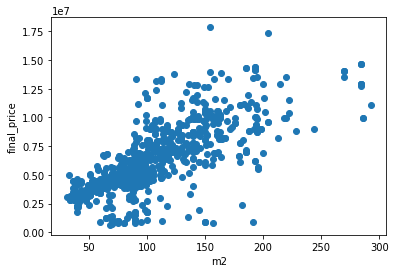

In [9]:
col_plot = 'm2'
col_plot_y = 'final_price'
df_plot = df_filtro.copy()
df_plot = df_plot[[col_plot, col_plot_y]]

df_plot.sort_values(col_plot_y, ascending=True, inplace=True)

plt.scatter(x=df_plot[col_plot], y=df_plot[col_plot_y])

plt.xlabel(col_plot)
plt.ylabel(col_plot_y)

plt.show()